# **MLPP25 // Assignment 1**

assigned : **Feb 7, 2025**

DUE : **Feb 14, 2025 11:59pm**

## Ridership of Urban Bike Shares: the case of Citi Bike in NYC

![alt text](https://d21xlh2maitm24.cloudfront.net/nyc/01unlock2.JPG?mtime=20160428123800)

---

### OVERVIEW

Bike share programs have been implemented in cities around the world in an effort to address multiple aspects of both city functioning and quality of life for urban populations.  Traffic congestion, public health, community engagement, and air quality have all aspects of city life that could *potentially* be impacted by the introduction of a bike share program into a community.

One particularly massive bike share is New York City's [Citi Bike](https://www.citibikenyc.com/) program.  The area coverage of this program is large (extending into New Jersey across the Hudson River) and ridership initial adoption rates – as measured by the number of rides taken – were promising.  However this program has not been without controversy and there has been active discussion regarding which communities ara actually being served and which are not, who is benefitting from the availability of bikes, how they are being used for recreational vs commuter purposes, etc.

The goal of this assignment is two-fold: first, you will learn to work with basic tabular data from the Citi Bike program and second, you will generate a simple estimate for the <u>which age group is predominantly using citi bikes for commuter travel</u>.

<br>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do, bear in mind that such models <u>often</u> yield incorrect solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

TEXT FOR YOUR ANSWER HERE

None

---

### **PART 1 - Background**

Good data science (and data analysis more generally) as well as the appropriate application of machine learning algorithms depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>

Read through the following resources (including links within) regarding the Citi Bike program and its impacts in NYC,

1. [official Citi Bike site](https://citibikenyc.com/)

2. [DOT Facts on Citi Bike](https://www.nyc.gov/html/dot/html/pr2013/facts-on-citi-bike.shtml)

3. [Cycling in the City](https://www.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2020.pdf)

4. [The Rise of Citi Bikes in New York City](https://thesciencesurvey.com/news/2021/03/21/the-rise-of-citi-bikes-in-new-york-city/)

</b>

### **PART 2 - Loading the data**

First things first, let's get access to the data.  To do that, we need to link this notebook with out Google Drive.  On the left there is a folder icon.  **Click that and in the popout menu click "Mount Drive" (i.e., the folder with the Google Drive icon).**  This will create a cell of code for you to run.  **Follow the instructions to link this notebook with your Google Drive.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In the menu on the left, **click the `drive` folder <small>(nb., you may need to click the folder with the refresh icon to see your `drive` folder)</small>, then `Shareddrives`, then locate the shared `mlpp25` directory**.  Inside of that is a directory called `data` and inside that is a directory called `citibike`.  In that folder is the citibike data.  **Right click on the file and select "copy path".  Put that path to the file into a string variable called `fname` and use pandas `read_csv()` function to load the data (no need to skip rows) into a pandas DataFrame called `citi`.**

In [2]:
import pandas as pd
import numpy as np
fname ='/content/drive/Shareddrives/mlpp25/data/citibike/JC-201604-citibike-tripdata.csv'
citi=pd.read_csv(fname)
citi

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1


### **PART 3 - Calculate useful metrics**

Our end goal is to get an estimate of what age riders are using citi bikes for commuter travel the most.  <u>We're going to do that by separating the trips into short and long trips and then finding the age that has the highest fraction of short trips.</u>

Let's convert a couple columns of data into some quantities that will be useful in our model below.

First, use the values from the "Birth Year" column to **calculate the age of the rider.  Add those values as a column called "age" in your `citi` DataFrame**.

In [3]:
from datetime import datetime
Present_year=datetime.now().year
citi['age']=Present_year-citi['Birth Year']
citi.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,46.0
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,71.0
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,50.0
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,44.0
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,44.0


Now, extract the "Trip Duration" column (the units of which are seconds) and **take the logarithm of those using numpy's `log10()` function$^{\dagger}$.  Put them into a column in `citi` called "logdur".**

<i><small>$^{\dagger}$ recall that log10(x) = y where 10<sup>y</sup> = x, so if a trip duration is `t` = 100 seconds, `np.log10(t)` = 2 since 10<sup>2</sup> = 100.</small>

In [4]:
citi["logdur"] = np.log10(citi["Trip Duration"])
citi.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age,logdur
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,46.0,3.318898
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,71.0,2.510545
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,50.0,2.587711
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,44.0,2.146128
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,44.0,2.152288


### **PART 4 - Visualize the data and update metrics**

Since we're interested in trip durations, **use `citi`'s `.hist()` method to plot a histogram of the "Trip Duration" column of the data setting the range from 0 to 10000 seconds and using 100 bins**.

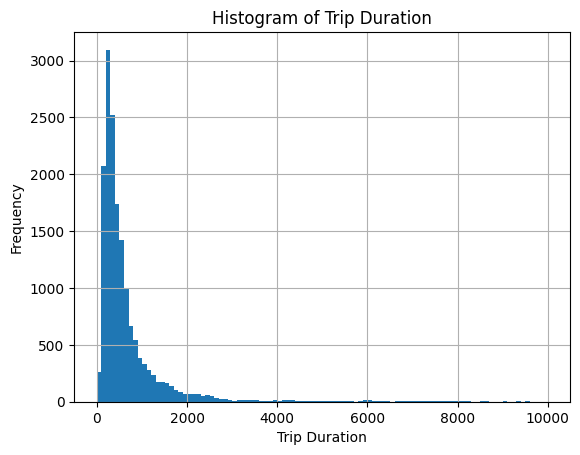

In [5]:
import matplotlib.pyplot as plt
citi["Trip Duration"].hist(bins=100,range=(0,10000))
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Duration")
plt.grid(True)
plt.show()


**Would you characterize this distribution as "Gaussian"?  Why or why not?**

No, This distribution is not Gaussian or Normal Distribution.

Reason:- By defination, Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean, but here the histogram of Trip Duration is heavily right-skewed, meaning there are a large number of short-duration trips, with fewer longer-duration trips.

Now, **plot a histogram with 100 bins (no need to set the range) of the logarithm of the trip durations that you calculated above**.

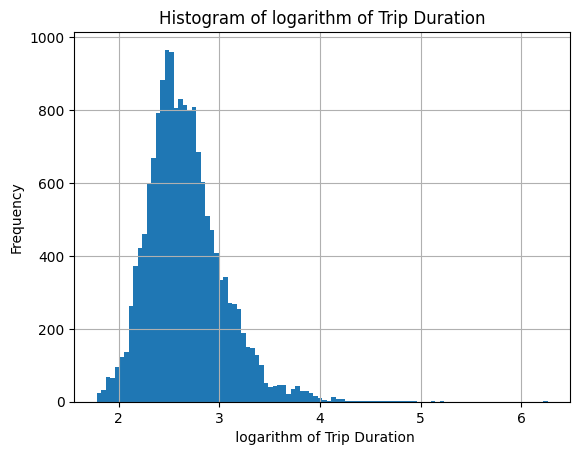

In [6]:
citi["logdur"].hist(bins=100)
plt.xlabel(" logarithm of Trip Duration")
plt.ylabel("Frequency")
plt.title("Histogram of logarithm of Trip Duration")
plt.grid(True)
plt.show()

**Would you characterize this distribution as Gaussian?  Why or why not?**

Yes, the distribution of log-transformed trip durations is approximately Gaussian or Normal Distribution.

Reason: Here, This histogram of log10(Trip Duration) is symmetric.The original trip duration data was heavily right-skewed. Taking the logarithm has compressed large values, bringing the distribution closer to symmetry.

The previous plot might give you a sense for how to break up the rides into "short" and "long" rides (which we'll use as a proxy for "commuter" and "recreational" respectively).  **Calculate the median of the logarithm of the trip duration.**

In [7]:
# Calculate the median of the log-transformed trip duration
median_of_logdur = citi["logdur"].median()
median_of_logdur


2.6138418218760693

We'll use this as the short/long dividing line.  **What is the duration of this trip in minutes?  Does that seem like a resonable time for commuting?  How far would you get in that time biking at 10 mph (and is that a reasonable biking speed)?**

In [8]:
median_in_seconds = 10 ** median_of_logdur
median_in_minutes = median_in_seconds / 60
biking_speed_mph = 10
biking_speed_miles_per_minute = biking_speed_mph / 60
distance_in_miles = median_in_minutes * biking_speed_miles_per_minute

median_in_minutes, distance_in_miles


(6.8500000000000005, 1.1416666666666666)

The duration of this is approximately 6.85 minutes.

This seems like a reasonable time for commuting for city-based rides where the bike stations are placed within a few miles of each other.
At a biking speed of 10 mph, you would cover 1.14 miles approximately in that time.
A speed of 10 mph is a comfortable speed for urban commuting, considering factors like traffic,terrains and signal lights.

**Add two columns to your `citi` dataframe: a column called "short_trip" that is `True` when the trip duration is less than dividing line above and `False` otherwise, and a column called "long_trip" that is `True` when the duration is greater than or equal to the dividing line above but `False` otherwise.**

In [9]:
citi["short_trip"] = citi["Trip Duration"] < (10 ** median_of_logdur)
citi["long_trip"] = citi["Trip Duration"] >= (10 ** median_of_logdur)
citi.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age,logdur,short_trip,long_trip
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,46.0,3.318898,False,True
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,71.0,2.510545,True,False
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,50.0,2.587711,True,False
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,44.0,2.146128,True,False
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,44.0,2.152288,True,False


Now, we're going to use a pandas dataframe trick that is quite useful (and related to similar functionality in other data analysis software) to "group" the data "by" the age using `citi`'s `.groupby()` method.  It also needs a function to perform on the groups which outputs another data frame.  If you've accomplished the above correctly, this line of code should execute without an error:

In [10]:
citig = citi.groupby("age").sum()
citig

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,logdur,short_trip,long_trip
age,,,,,,,,,,,,,,,,,,
26.0,3393,2016-04-26 19:29:102016-04-29 15:43:002016-04-...,2016-04-26 19:37:432016-04-29 15:51:132016-04-...,15980,Grove St PATHPaulus HookSip Ave5 Corners Libra...,203.630178,-370.263740,15980,Paulus HookGrove St PATH5 Corners LibrarySip A...,203.630178,-370.263740,122472,SubscriberSubscriberSubscriberSubscriberSubscr...,9995.0,5,13.760617,1,4
27.0,9242,2016-04-02 19:18:442016-04-08 17:40:452016-04-...,2016-04-02 19:33:032016-04-08 17:56:242016-04-...,28797,Heights ElevatorHeights ElevatorHeights Elevat...,366.675084,-666.375402,28812,Hamilton ParkHamilton ParkHamilton ParkHamilto...,366.611724,-666.386814,221001,SubscriberSubscriberSubscriberSubscriberSubscr...,17982.0,18,27.041874,0,9
28.0,1125,2016-04-16 15:38:05,2016-04-16 15:56:51,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24607,Subscriber,1997.0,2,3.051153,0,1
29.0,23395,2016-04-01 10:23:522016-04-04 09:15:152016-04-...,2016-04-01 10:35:432016-04-04 09:26:512016-04-...,111869,McGinley SquareMcGinley SquareMcGinley SquareM...,1425.350754,-2592.103091,112063,Grove St PATHNewark AveNewark AveNewark AveNew...,1425.279581,-2591.629175,858796,SubscriberSubscriberSubscriberSubscriberSubscr...,69860.0,70,95.968006,8,27
30.0,20720,2016-04-01 20:04:432016-04-04 03:02:222016-04-...,2016-04-01 20:07:042016-04-04 03:05:042016-04-...,76717,Newport PATHNewport PkwyNewport PATHGrove St P...,977.407891,-1776.809458,73898,Newport PkwyNewport PATHNewport PkwyWarren StG...,977.440750,-1776.802818,590006,SubscriberSubscriberSubscriberSubscriberSubscr...,47880.0,26,62.197159,14,10
31.0,55165,2016-04-01 07:45:002016-04-01 10:51:492016-04-...,2016-04-01 07:55:182016-04-01 11:15:042016-04-...,316750,Brunswick StNorth StGrove St PATHSip AveBrunsw...,4031.686730,-7330.450336,316693,Paulus HookNewark AveBrunswick StPershing Fiel...,4031.529910,-7330.347259,2433245,SubscriberSubscriberSubscriberSubscriberSubscr...,197406.0,101,266.469501,27,72
32.0,63088,2016-04-01 08:43:262016-04-01 17:08:382016-04-...,2016-04-01 08:47:012016-04-01 17:18:422016-04-...,341897,City HallGrove St PATHCity HallNewport PATHPer...,4357.824130,-7922.574932,342114,Newark AveNewport PkwyNewark AveWarren StSip A...,4357.846796,-7922.587162,2626412,SubscriberSubscriberSubscriberSubscriberSubscr...,213251.0,122,282.779474,49,58
33.0,110970,2016-04-01 09:39:442016-04-01 10:15:192016-04-...,2016-04-01 09:49:582016-04-01 10:17:462016-04-...,703969,Brunswick StVan Vorst ParkBrunswick StGrove St...,8958.976089,-16290.116760,703634,Paulus HookGrove St PATHGrove St PATHVan Vorst...,8958.725531,-16289.838018,5401029,SubscriberSubscriberSubscriberSubscriberSubscr...,438240.0,241,558.554493,134,86
34.0,278602,2016-04-01 02:26:492016-04-01 06:59:042016-04-...,2016-04-01 02:35:222016-04-01 07:02:322016-04-...,1785391,Warren StBrunswick StBaldwin at MontgomeryBald...,22725.035326,-41318.919718,1785441,Newport PkwyGrove St PATHSip AveSip AveGrove S...,22724.330612,-41318.363292,13698900,SubscriberSubscriberSubscriberSubscriberSubscr...,1110978.0,716,1426.528083,324,234


This new dataframe should now have an index that is the age groups and two columns (called "short_trip" and "long_trip") that are the sums of short and long trips for that age group.  **Get the total number of trips for that age group by adding those together.**

In [11]:

citig["total_trips"] = citig["short_trip"] + citig["long_trip"]
citig

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,logdur,short_trip,long_trip,total_trips
age,,,,,,,,,,,,,,,,,,,
26.0,3393,2016-04-26 19:29:102016-04-29 15:43:002016-04-...,2016-04-26 19:37:432016-04-29 15:51:132016-04-...,15980,Grove St PATHPaulus HookSip Ave5 Corners Libra...,203.630178,-370.263740,15980,Paulus HookGrove St PATH5 Corners LibrarySip A...,203.630178,-370.263740,122472,SubscriberSubscriberSubscriberSubscriberSubscr...,9995.0,5,13.760617,1,4,5
27.0,9242,2016-04-02 19:18:442016-04-08 17:40:452016-04-...,2016-04-02 19:33:032016-04-08 17:56:242016-04-...,28797,Heights ElevatorHeights ElevatorHeights Elevat...,366.675084,-666.375402,28812,Hamilton ParkHamilton ParkHamilton ParkHamilto...,366.611724,-666.386814,221001,SubscriberSubscriberSubscriberSubscriberSubscr...,17982.0,18,27.041874,0,9,9
28.0,1125,2016-04-16 15:38:05,2016-04-16 15:56:51,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24607,Subscriber,1997.0,2,3.051153,0,1,1
29.0,23395,2016-04-01 10:23:522016-04-04 09:15:152016-04-...,2016-04-01 10:35:432016-04-04 09:26:512016-04-...,111869,McGinley SquareMcGinley SquareMcGinley SquareM...,1425.350754,-2592.103091,112063,Grove St PATHNewark AveNewark AveNewark AveNew...,1425.279581,-2591.629175,858796,SubscriberSubscriberSubscriberSubscriberSubscr...,69860.0,70,95.968006,8,27,35
30.0,20720,2016-04-01 20:04:432016-04-04 03:02:222016-04-...,2016-04-01 20:07:042016-04-04 03:05:042016-04-...,76717,Newport PATHNewport PkwyNewport PATHGrove St P...,977.407891,-1776.809458,73898,Newport PkwyNewport PATHNewport PkwyWarren StG...,977.440750,-1776.802818,590006,SubscriberSubscriberSubscriberSubscriberSubscr...,47880.0,26,62.197159,14,10,24
31.0,55165,2016-04-01 07:45:002016-04-01 10:51:492016-04-...,2016-04-01 07:55:182016-04-01 11:15:042016-04-...,316750,Brunswick StNorth StGrove St PATHSip AveBrunsw...,4031.686730,-7330.450336,316693,Paulus HookNewark AveBrunswick StPershing Fiel...,4031.529910,-7330.347259,2433245,SubscriberSubscriberSubscriberSubscriberSubscr...,197406.0,101,266.469501,27,72,99
32.0,63088,2016-04-01 08:43:262016-04-01 17:08:382016-04-...,2016-04-01 08:47:012016-04-01 17:18:422016-04-...,341897,City HallGrove St PATHCity HallNewport PATHPer...,4357.824130,-7922.574932,342114,Newark AveNewport PkwyNewark AveWarren StSip A...,4357.846796,-7922.587162,2626412,SubscriberSubscriberSubscriberSubscriberSubscr...,213251.0,122,282.779474,49,58,107
33.0,110970,2016-04-01 09:39:442016-04-01 10:15:192016-04-...,2016-04-01 09:49:582016-04-01 10:17:462016-04-...,703969,Brunswick StVan Vorst ParkBrunswick StGrove St...,8958.976089,-16290.116760,703634,Paulus HookGrove St PATHGrove St PATHVan Vorst...,8958.725531,-16289.838018,5401029,SubscriberSubscriberSubscriberSubscriberSubscr...,438240.0,241,558.554493,134,86,220
34.0,278602,2016-04-01 02:26:492016-04-01 06:59:042016-04-...,2016-04-01 02:35:222016-04-01 07:02:322016-04-...,1785391,Warren StBrunswick StBaldwin at MontgomeryBald...,22725.035326,-41318.919718,1785441,Newport PkwyGrove St PATHSip AveSip AveGrove S...,22724.330612,-41318.363292,13698900,SubscriberSubscriberSubscriberSubscriberSubscr...,1110978.0,716,1426.528083,324,234,558


**Plot the fraction of trips that are short as a function of age group.**$^{\dagger}$

<small>$^{\dagger}$ you can access the index values of a dataframe like so: `age_group = citig.index`</small>

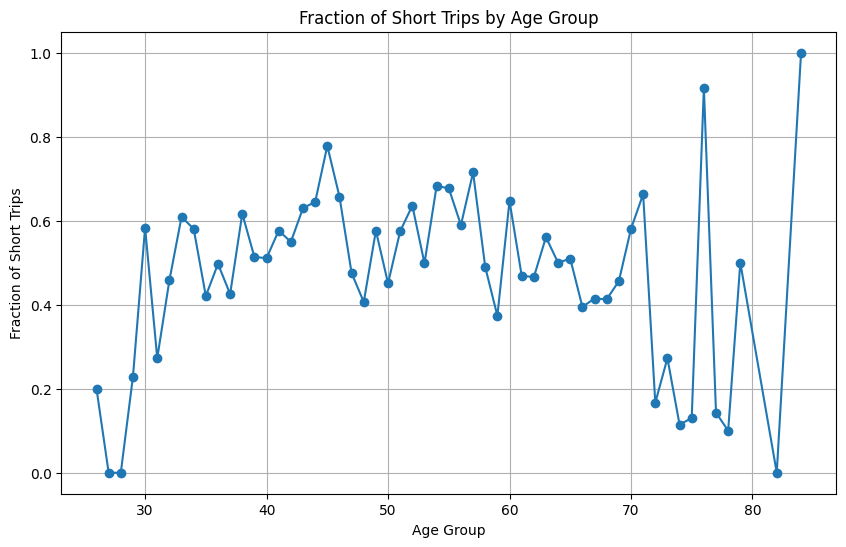

In [12]:
citig["short_trip_fraction"] = citig["short_trip"] / citig["total_trips"]

plt.figure(figsize=(10,6))
plt.plot(citig.index, citig["short_trip_fraction"], marker='o', linestyle='-')
plt.xlabel("Age Group")
plt.ylabel("Fraction of Short Trips")
plt.title("Fraction of Short Trips by Age Group")
plt.grid(True)
plt.show()


**What is the age group that is predominantly using citi bikes for commuting?  How did you make that determination?**

BY considering "Fraction of short time" as determination parameter then the age group "84 years old" has high fraction of short time which is 100% that is it has total trips are 8 which all are short trips.


If we filter the age groups which has trips less than 10, then the age group "76 years old" has highest "Fraction of short time", where it has total of 12 trips, which has 11 are short trips.


considering both the highest number of total trips and a high fraction of short trips, is 44 years old, with 920 total trips, 64.5% of which are short trips.This suggests that mid-aged riders (around their 40s) are the most frequent Citi Bike users for commuting purposes.

**What are the assumptions that went into finding this model?  And how do your findings relate to the information in the resources in Part 1?**

Assumptions that went into finding this model are:-

1.Trip duration assumption, where We assumed that short trips (≤6.85 minutes) primarily represent commuters, while long trips (>6.85 minutes) represent recreational riders.

2. logarthimic tranformation assumption, where we use the median log duration as a dividing line, but it does not necessarily mean all short trips are commutes.

3. Biking Speed Assumption (10 mph)
4. Age as a Factor in Commuting Behavior assumption.


Relation to resources in Part-1:-

Understanding the Context of Citi Bike Usage:

Understanding Citi Bike usage requires considering factors beyond trip duration, such as transit proximity, bike lanes, and time of day.

Data Collection & Biases:

Citi Bike data excludes non-users and doesn’t capture ride purpose, making commuting assumptions inferred, not observed.

Comparing With Existing Transportation Studies:

Research shows adults in their 20s-40s are the main Citi Bike users. Our finding that 44-year-olds take the most trips aligns but excludes students and gig workers.




TEXT FOR YOUR ANSWER HERE

### **EXTRA CREDIT - Fit a model parameter by hand (aka: "fit by eye")**

Let's approximate the number of short trips as a function of age group by a parabola.  Here's the function we'll use:

In [13]:
def short_by_age(age_groups, peak_age, peak_value):
  """
  Generate a model for the fraction of trips that are short as a
  function of age group.
  """


  model = -6e-4 * (age_groups - peak_age)**2 + peak_value

  return model


**Use the above function to fit the `peak_age` and `peak_value` parameters "by eye".**  By that I mean, choose some values, plot it, chose a new value and plot it to see if it fits better by eye, then repeat until you have something that looks reasonable.

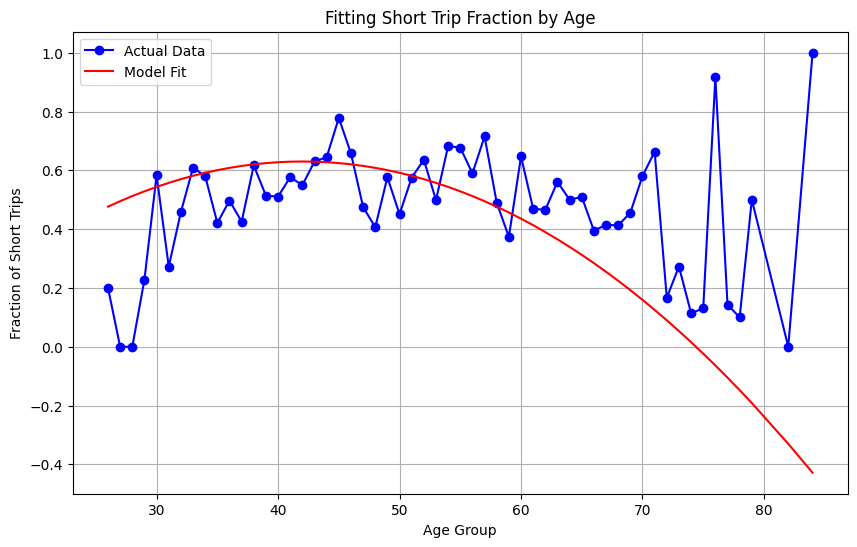

In [21]:
age_groups = citig.index
peak_age = 42  # Initial guess for peak commuting age
peak_value = 0.63  # Initial guess for the fraction of short trips at peak
model_values = short_by_age(age_groups, peak_age, peak_value)

plt.figure(figsize=(10,6))
plt.plot(age_groups, citig["short_trip_fraction"], 'bo', label="Actual Data", linestyle='-')
plt.plot(age_groups, model_values, 'r-', label="Model Fit")
plt.xlabel("Age Group")
plt.ylabel("Fraction of Short Trips")
plt.title("Fitting Short Trip Fraction by Age")
plt.legend()
plt.grid(True)
plt.show()